# Ensemble Learning and Random Forests

In [2]:
# Importing Libraries 
import numpy as np
import pandas as pd
import sklearn
import sys
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
%matplotlib inline

## Voting Classifiers

Taking the case of slightly biased coin that has 51% chance of coming up headsand 49% chance of coming up tails. By applying the _Law of Large Numbers_, we can demonstrate that the ratio of heads comes very close to the probability of heads.

In [11]:
heads_probab = 0.51 # Probability of heads in a slightly biased coin
coin_tosses = (np.random.rand(50000, 10) < heads_probab).astype(np.int32)
cumulative_heads_ratio = np.cumsum(coin_tosses, axis=0) / np.arange(1, 50001).reshape(-1, 1)

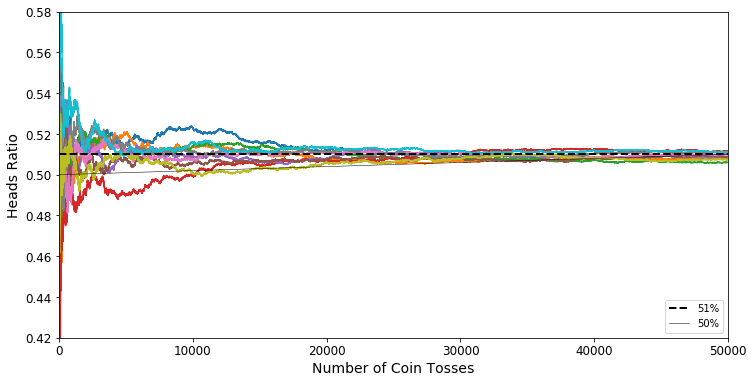

In [12]:
# Plotting
plt.figure(figsize=(12,6))
plt.plot(cumulative_heads_ratio)
plt.plot([0, 50000], [0.51, 0.51], "k--", linewidth=2, label="51%")
plt.plot([0, 50000], [0.5, 0.51], "k-", linewidth=0.5, label="50%")
plt.xlabel("Number of Coin Tosses")
plt.ylabel("Heads Ratio")
plt.legend(loc="lower right")
plt.axis([0, 50000, 0.42, 0.58])
plt.show()

Applying the same principle training a number of classifiers that are weak individually, but produce a high accuracy output in the form of an _Ensemble_.

For the purposes of building our Ensemble, we will be using the _Moon's Dataset_ in Scikit-Learn.

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [26]:
# Building the ensemble using the Random Forest, SVM, 
# Logistic Regression and Voting Classifier algorithms.
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression(solver='lbfgs', random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(gamma='scale', random_state=42)

# Training the voting classifier on the three models above
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')

voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=42,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                               

In [27]:
# Assessing each classifier's accuracy on the test set.
from sklearn.metrics import accuracy_score

for classifier in (log_clf, rnd_clf, svm_clf, voting_clf):
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    print(classifier.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.896
SVC 0.896
VotingClassifier 0.912


Thus, the Voting Classifier scores slighty better than the other three classifiers. 

Alternatively, we can also consider the case of a _Soft Voting_ classifier, which predicts the class with the highest probability averaged over all the individual classifiers. **This often achieves a higher accuracy score than hard voting because it gives more weight to highly confident votes**.

In [28]:
# Using soft voting
log_clf = LogisticRegression(solver='lbfgs', random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
# Setting probability hyper-parameter to 'True' to make the SVC class use cross-validation
# to estimate class probabilities
svm_clf = SVC(gamma='scale', probability=True, random_state=42)

voting_clf = VotingClassifier(
        estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
        voting = 'soft'
)
 
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=42,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                               

In [31]:
# Getting accuracy scores
for classifier in (log_clf, rnd_clf, svm_clf, voting_clf):
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    print(classifier.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.896
SVC 0.896
VotingClassifier 0.92


At 92%, this model has a slightly higher accuracy than the hard voting ensemble classifier.

## Bagging and Pasting